## Read and Wrangle Data

In [1]:
# read a csv file
library(tidyverse)
setwd("/Users/haradamayu/InorganicAnalysis_2025")
data <- read_csv("data/InorganicAnalysis_WholeClass.csv", skip = 1)
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 24 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Sample
dbl (22): Group, DAS, Fresh Weight (g), Dry Weight (g), Water Content, SPAD ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Group,Sample,DAS,Fresh Weight (g),Dry Weight (g),Water Content,SPAD Value,Fv/Fm,ΦII_GL,ΦII_HL,⋯,NO3-N (%),Share of NO3-N (%),NO3 (mg/kg FW),Total P (%),Pi (%),Share of Pi (%),K (%),NO3- (mM),Pi (mM),K+ (mM)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N150,32,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
1,N250,32,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
2,N150,25,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
2,N250,25,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
3,N150,32,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
3,N250,32,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


In [2]:
# wrangle the dataset
library(janitor)
library(dplyr)
library(tidyr)
data_wl <- data |>
    mutate(SampleLabel = str_c(Sample, "_", DAS, "d")) |>
    relocate(SampleLabel, .before = 4) |>
    mutate(DAS = str_c(DAS, "d")) |>
    relocate(DAS, .before = 3) |>
    dplyr::select(-Group) |>
    clean_names()
data_wl$sample_label <- as.factor(data_wl$sample_label)
head(data_wl)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




sample,das,sample_label,fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,⋯,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N150,32d,N150_32d,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
N250,32d,N250_32d,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
N150,25d,N150_25d,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
N250,25d,N250_25d,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
N150,32d,N150_32d,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
N250,32d,N250_32d,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


## Multiple Data Graph 1: DAS and N

In [3]:
# wrangle the data
data_long <- data_wl |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value") |>
    dplyr::select(sample_label:Value)
head(data_long)

sample_label,Variable,Value
<fct>,<chr>,<dbl>
N150_32d,fresh_weight_g,71.700
N150_32d,dry_weight_g,3.920
N150_32d,water_content,17.300
N150_32d,spad_value,34.200
N150_32d,fv_fm,0.774
N150_32d,phii_gl,0.426


In [4]:
cols_name <- c("fresh_weight_g", "dry_weight_g", "water_content", 
          "spad_value", "fv_fm", "phii_gl", "phii_hl", "npq_gl", "npq_hl", 
          "kjeldahl_n_percent", "no3_n_percent", "share_of_no3_n_percent", "no3_mg_kg_fw", 
          "total_p_percent", "pi_percent", "share_of_pi_percent", "k_percent", 
          "no3_m_m", "pi_m_m", "k_m_m")

cols_tbl <- tibble(cols_name) |>
    mutate(cols_name = str_c(cols_name)) 

In [5]:
# make a tibble for tukey results (ANOVA done)

library(multcomp)
library(multcompView)

abc_result <- map(cols_name, function(col) {
  res <- aov(reformulate("sample_label", response = col), data = data_wl)
  tuk <- glht(res, linfct = mcp(sample_label = "Tukey"))
  mltv <- cld(tuk, decreasing = FALSE)
  letters <- mltv[["mcletters"]][["Letters"]]
  return(letters)
})

abc_result <- tibble::as_tibble(abc_result, .name_repair = "minimal")
colnames(abc_result) <- cols_tbl$cols_name
abc_result

tukey_result2 <- data_wl |>
    group_by(sample_label) |>
    summarize(across(fresh_weight_g:k_m_m, mean, na.rm = TRUE)) |>
    mutate(abc_result) |>
    dplyr::select(sample_label, fresh_weight_g:k_m_m) |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "result")
head(tukey_result2)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,npq_gl,npq_hl,kjeldahl_n_percent,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,a,ab,a,a,a,a,a,a,a,a,ab,ab,a,a,a,a,ab,a,a
b,b,b,a,a,a,a,a,a,b,b,c,c,a,a,a,b,c,a,a
a,a,a,a,a,a,a,a,a,c,c,a,a,a,a,a,a,a,a,a
b,b,b,a,a,a,a,a,a,d,ab,bc,bc,a,a,a,b,bc,a,a


Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(fresh_weight_g:k_m_m, mean, na.rm = TRUE)`.
ℹ In group 1: `sample_label = N150_25d`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


sample_label,Variable,result
<fct>,<chr>,<chr>
N150_25d,fresh_weight_g,a
N150_25d,dry_weight_g,a
N150_25d,water_content,ab
N150_25d,spad_value,a
N150_25d,fv_fm,a
N150_25d,phii_gl,a


In [6]:
data_max <- data_wl |>
    dplyr::select(fresh_weight_g:k_m_m) |>
    map_dfr(max, na.rm = TRUE)
vec_max <- as.numeric(data_max[1, ])
vec_max_rep <- as.vector(matrix(rep(vec_max, each = 4), nrow = 20, byrow = TRUE))

In [7]:
# colour pallet
colour_code <- c("N150_25d" = "#44B3E1", 
                 "N150_32d" = "#156082", 
                 "N250_25d" = "#F1A983", 
                 "N250_32d" = "#E97132")

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


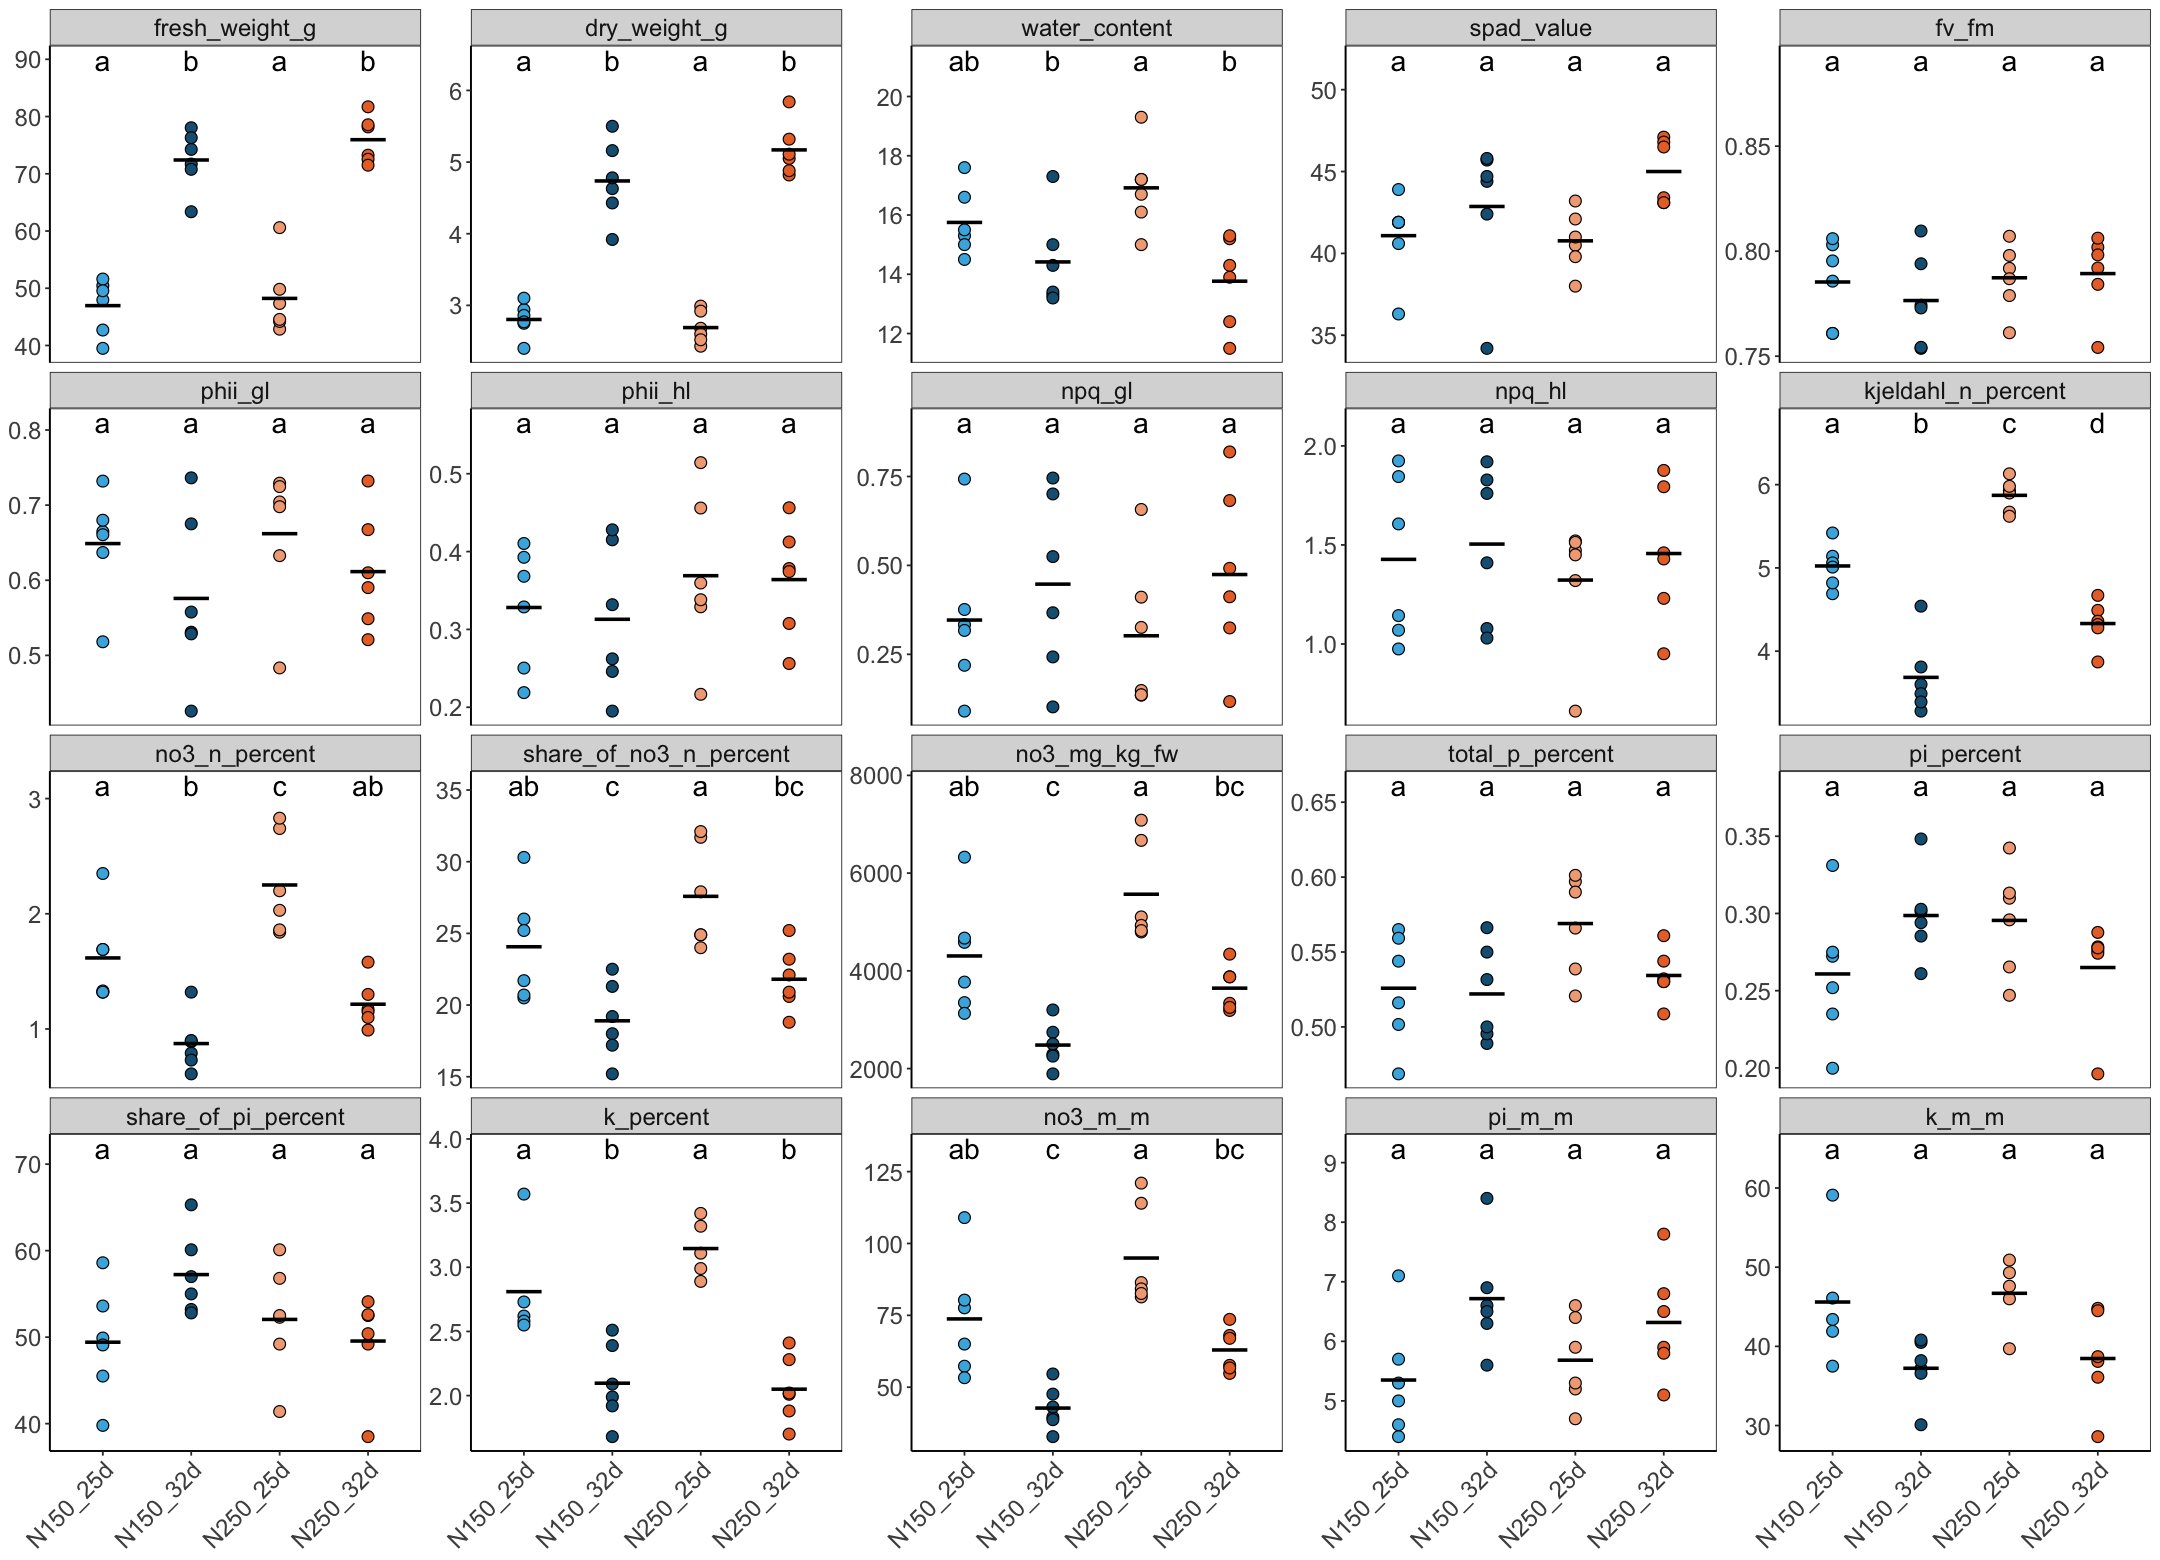

In [8]:
# draw a plot
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

variable_order <- unique(data_long$Variable)
data_long$Variable <- factor(data_long$Variable, levels = variable_order)
tukey_result2$Variable <- factor(tukey_result2$Variable, levels = variable_order)

facet_plot <- data_long |>
    ggplot(aes(x = sample_label, y = Value, fill = sample_label)) +
    geom_jitter(shape = 21, colour = "black", width = 0, size = 3) +
    stat_summary(fun = mean, geom = "crossbar", width = 0.4, fatten = 2, colour = "black") +
    geom_text(data = tukey_result2, aes(x = sample_label, y = vec_max_rep + vec_max_rep/10, label = result),
            size = 6, inherit.aes = FALSE) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
facet_plot  

## Multiple Data Graph 2: DAS

In [9]:
pre_das <- data |>
    dplyr::select(-Group, -Sample) |>
    mutate(DAS = str_c(DAS, "d")) |>
    clean_names() |>
    mutate(kjeldahl_n_g = kjeldahl_n_percent*dry_weight_g/100,
           no3_n_g = no3_n_percent*dry_weight_g/100, 
           k_g = k_percent*dry_weight_g/100, 
           total_p_g = total_p_percent*dry_weight_g/100, 
           pi_g = pi_percent*dry_weight_g/100) |>
    pivot_longer(cols = fresh_weight_g:pi_g, names_to = "Variable", values_to = "Value")
head(pre_das)

das,Variable,Value
<chr>,<chr>,<dbl>
32d,fresh_weight_g,71.700
32d,dry_weight_g,3.920
32d,water_content,17.300
32d,spad_value,34.200
32d,fv_fm,0.774
32d,phii_gl,0.426


In [10]:
# f-test for das
library(purrr)

f_t_das <- pre_das |>
    group_split(Variable) |>
    map_dfr(function(df) {varname <- unique(df$Variable)
                        g1 <- df %>% filter(das == "32d") %>% pull(Value) %>% na.omit()
                        g2 <- df %>% filter(das == "25d") %>% pull(Value) %>% na.omit()
                        if (sd(g1) >= sd(g2)) {group1 <- g1
                                               group2 <- g2} 
                        else {group1 <- g2
                              group2 <- g1}
                        f_test <- var.test(group1, group2)
                        t_test <- t.test(group1, group2, var.equal = f_test$p.value > 0.05)
                        tibble(Variable = varname,
                               f_p_value = f_test$p.value,
                               var_equal = f_test$p.value > 0.05,
                               t_p_value = t_test$p.value,
                               t_statistic = t_test$statistic,
                               t_method = t_test$method,
                               t_p_signif = symnum(t_test$p.value, 
                                                   corr = FALSE,
                                                   cutpoints = c(0,0.001,0.01,0.05,1),
                                                   symbols = c("***", "**", "*", "ns")))})

head(f_t_das)
f_t_das_false <- f_t_das |>
    filter(var_equal == FALSE) |>
    dplyr::select(Variable)
f_t_das_false

Variable,f_p_value,var_equal,t_p_value,t_statistic,t_method,t_p_signif
<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<noquote>
dry_weight_g,0.01315471,FALSE,4.835088e-10,13.8348588,Welch Two Sample t-test,***
fresh_weight_g,0.66619605,TRUE,1.647300e-11,-12.5601138,Two Sample t-test,***
fv_fm,0.56054181,TRUE,6.663059e-01,-0.4370908,Two Sample t-test,ns
k_g,0.02462705,FALSE,1.322477e-04,5.0030804,Welch Two Sample t-test,***
k_m_m,0.44491358,TRUE,2.119268e-03,3.5268242,Two Sample t-test,**
k_percent,0.34318279,TRUE,1.890967e-06,6.6230059,Two Sample t-test,***


Variable
<chr>
dry_weight_g
k_g
kjeldahl_n_g
total_p_g


In [11]:
# define the position of p.signif
pre_das_max <- pre_das |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

# split data
data_das <- pre_das |>
    filter(Variable != "kjeldahl_n_g" & Variable != "no3_n_g" & Variable != "k_g" & Variable != "total_p_g" & Variable != "pi_g") 
data_das_g <- pre_das |>
    filter(Variable == "kjeldahl_n_g" | Variable == "no3_n_g" | Variable == "k_g" | Variable == "total_p_g" | Variable == "pi_g")

f_t_das2 <- f_t_das |>
    left_join(pre_das_max, by = "Variable") |>
    filter(Variable != "kjeldahl_n_g" & Variable != "no3_n_g" & Variable != "k_g" & Variable != "total_p_g" & Variable != "pi_g")

# define the order
variable_order_das <- unique(data_das$Variable)
data_das$Variable <- factor(data_das$Variable, levels = variable_order_das)
pre_das_max$Variable <- factor(pre_das_max$Variable, levels = variable_order_das)
f_t_das2$Variable <- factor(f_t_das2$Variable, levels = variable_order_das)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


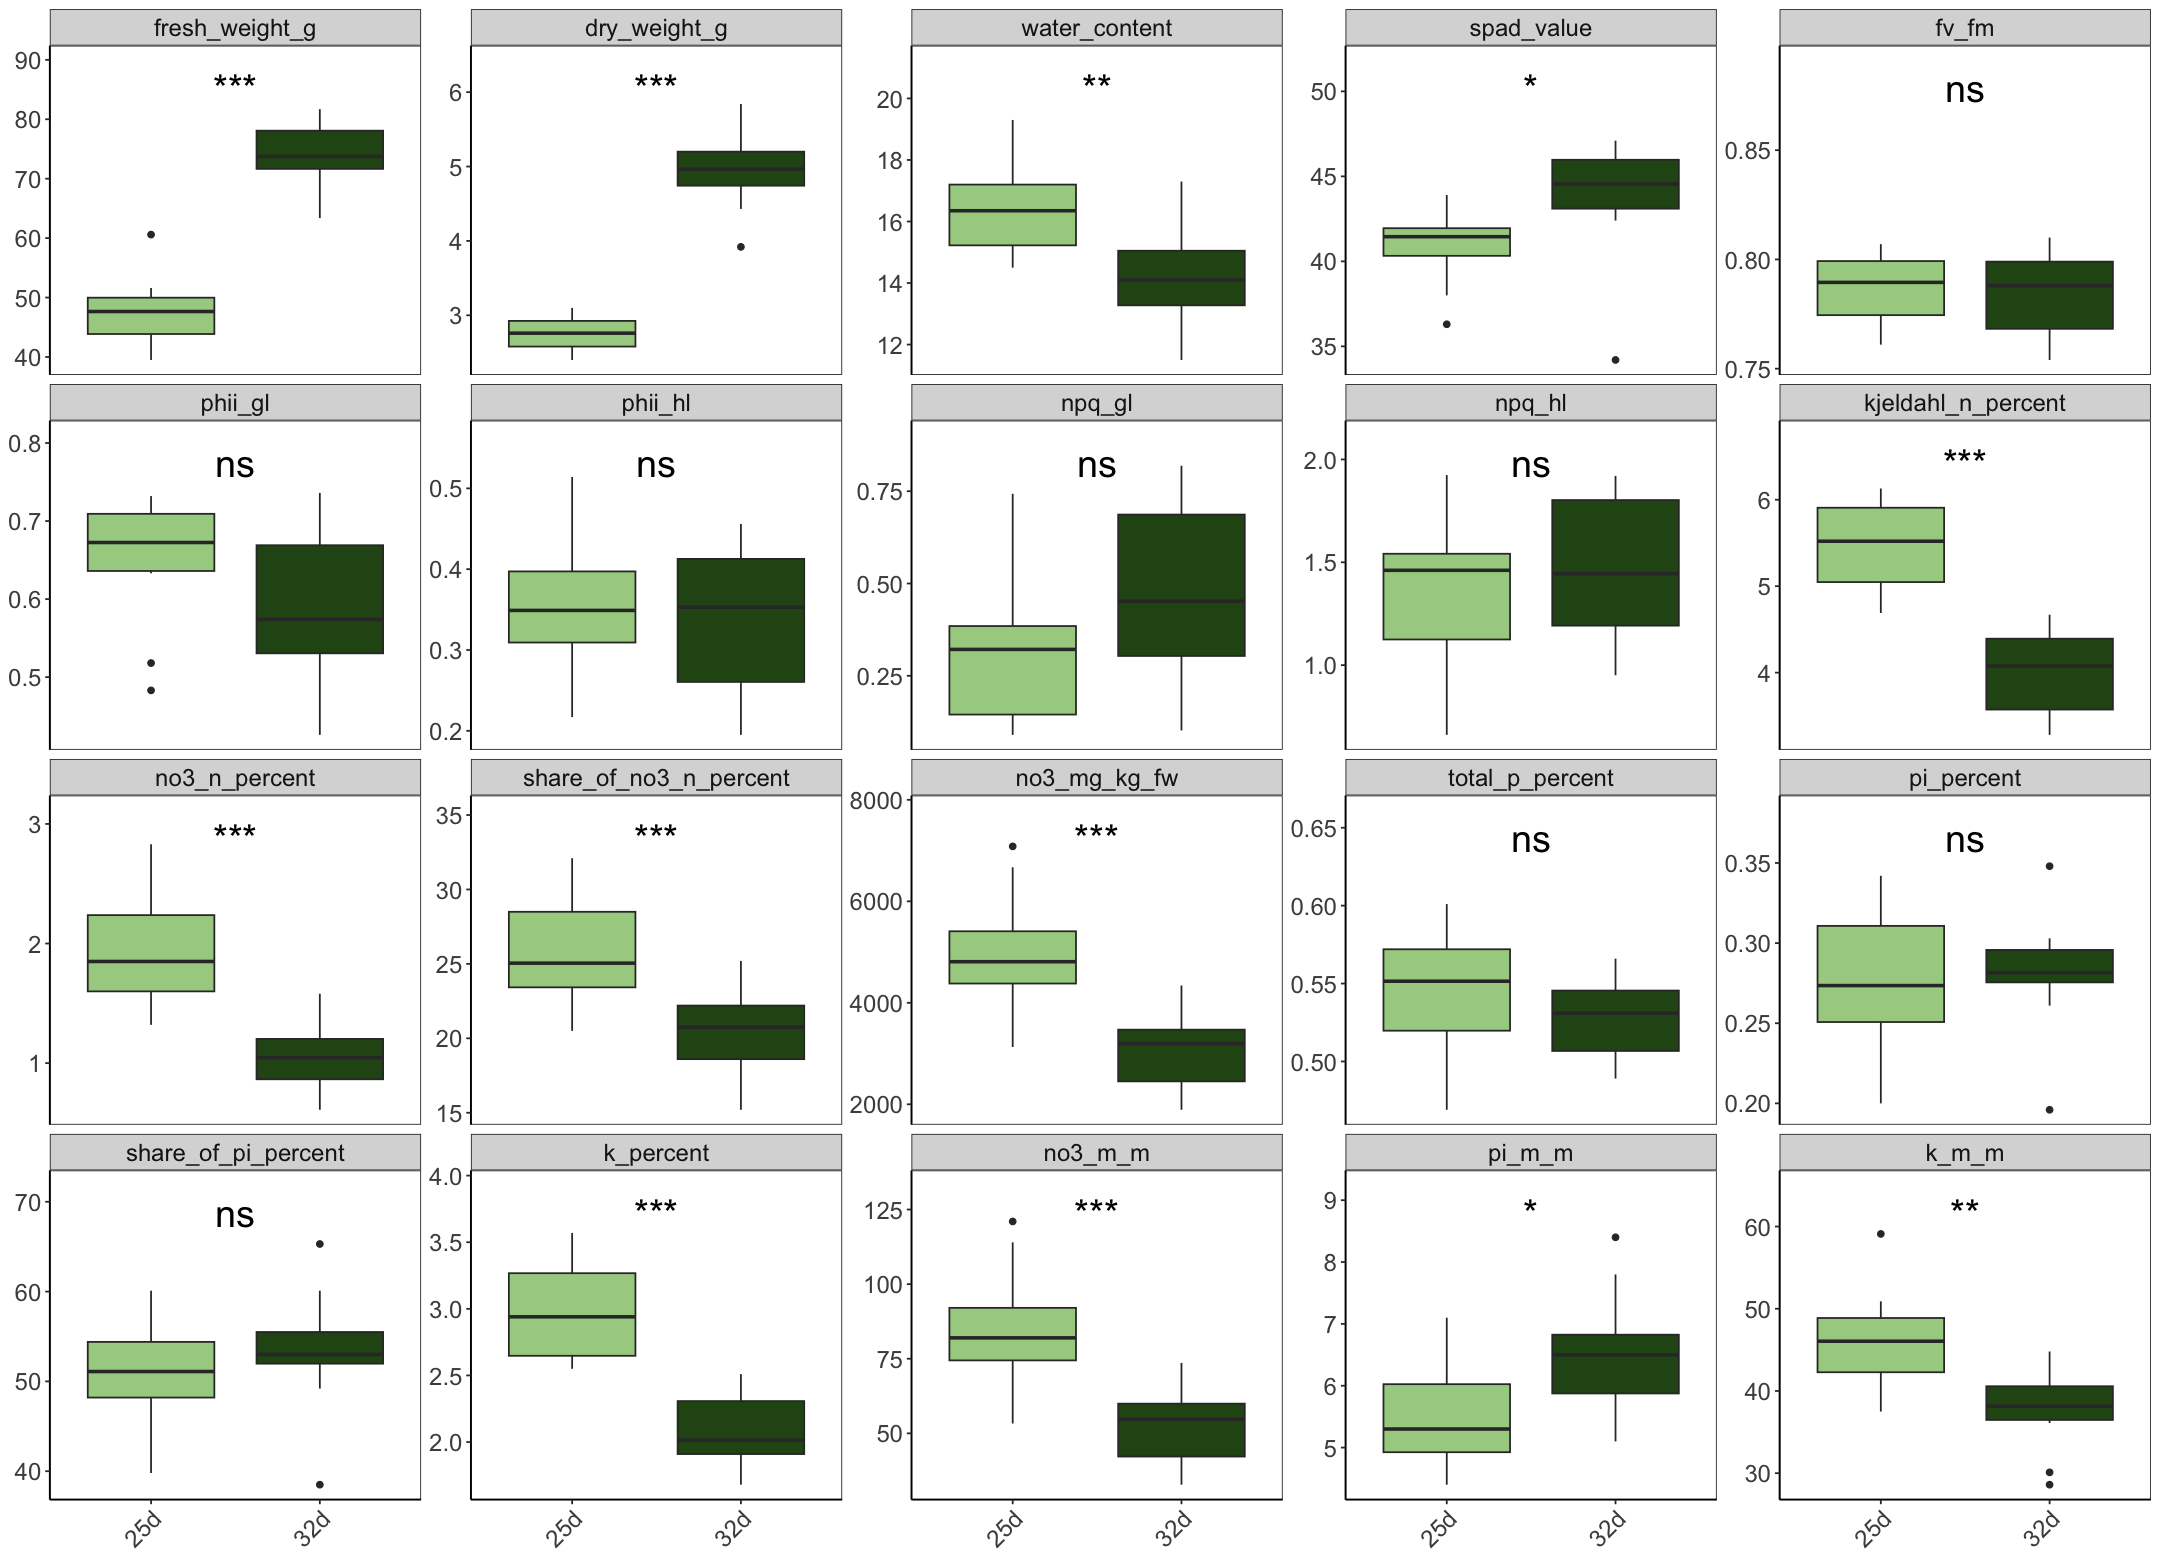

In [12]:
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code_das <- c("25d" = "#A6D08F", "32d" = "#275317")

# common theme
common_theme <- theme_bw() +
  theme(
    text = element_text(size = 18),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.line = element_line(colour = "black"),
    panel.grid = element_blank(),
    plot.title = element_text(hjust = 0.5),
    legend.position = "none"
  )

# draw a plot
das_plot <- data_das |>
    ggplot(aes(x = das, y = Value, fill = das)) +
    geom_boxplot() +
    geom_text(data = f_t_das2,
              aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
              inherit.aes = FALSE,
              vjust = 1.5,
              size = 8) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code_das) +
    common_theme
das_plot

### Absolute Amounts of N and K by DAS

In [13]:
# make a tibble for F/T test 
f_t_das3 <- f_t_das |>
    left_join(pre_das_max, by = "Variable") |>
    filter(Variable == "kjeldahl_n_g" | Variable == "no3_n_g" | Variable == "k_g" | Variable == "total_p_g" | Variable == "pi_g")
f_t_das3_kjeldahl <- filter(f_t_das3, Variable == "kjeldahl_n_g")
f_t_das3_no3 <- filter(f_t_das3, Variable == "no3_n_g")
f_t_das3_k <- filter(f_t_das3, Variable == "k_g")
f_t_das3_total_p <- filter(f_t_das3, Variable == "total_p_g")
f_t_das3_pi <- filter(f_t_das3, Variable == "pi_g")

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


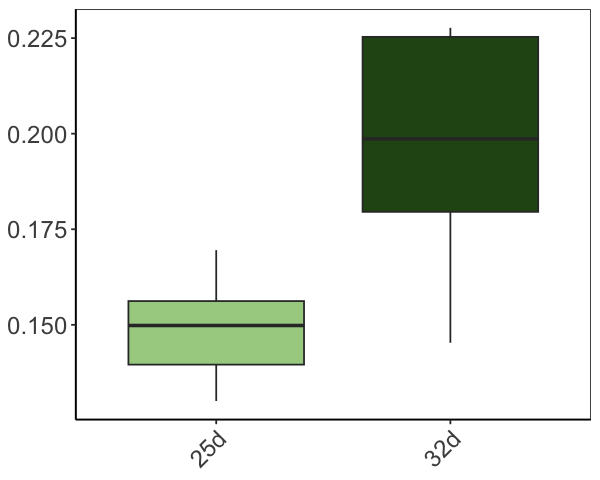

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


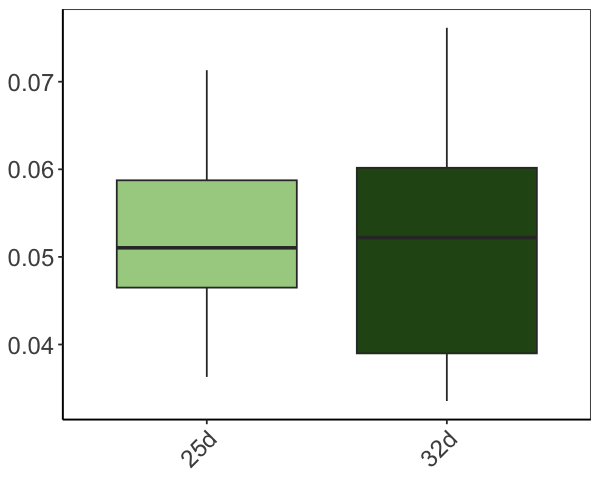

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


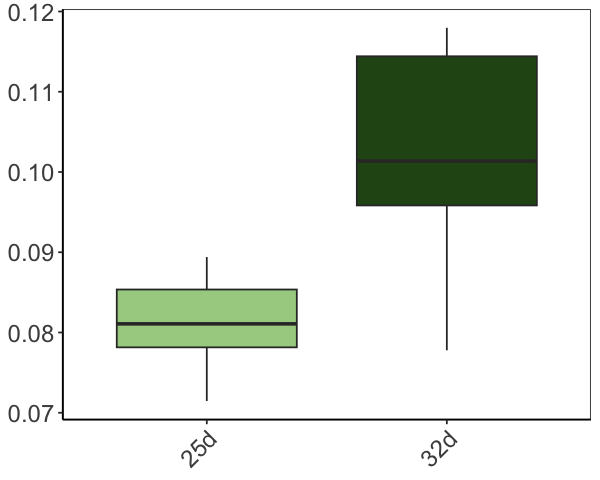

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


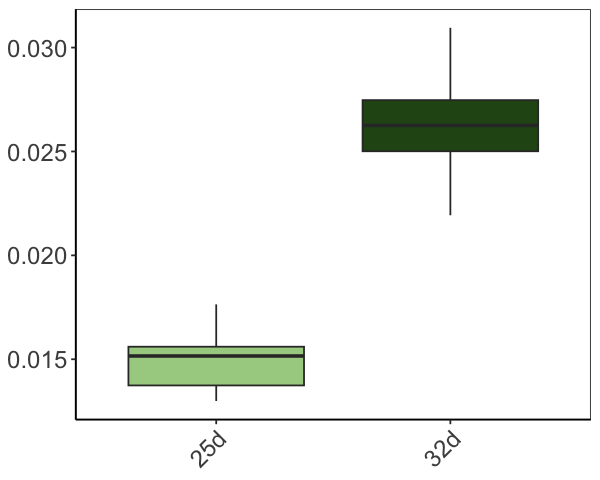

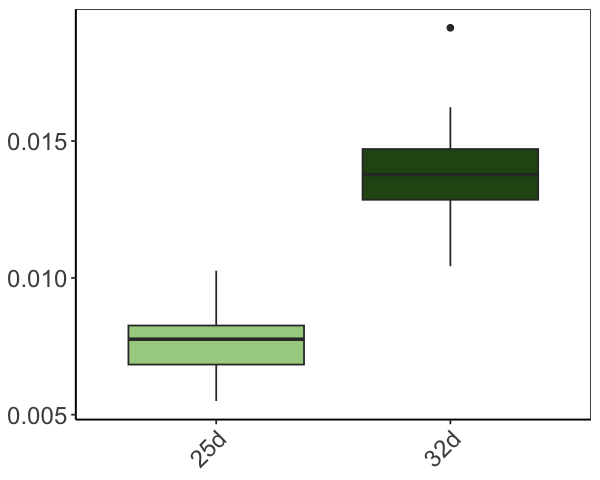

In [14]:
# define a function to make plots
make_boxplot <- function(variable_name, signif_df) {
  data_das_g |>
    dplyr::filter(Variable == variable_name) |>
    ggplot(aes(x = das, y = Value, fill = das)) +
    geom_boxplot() +
    geom_text(
      data = signif_df,
      aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
      inherit.aes = FALSE,
      vjust = 1.5,
      size = 8
    ) +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code_das) +
    common_theme          
}

# draw plots
options(repr.plot.width = 5, repr.plot.height = 4)
kjeldahl_plot <- make_boxplot("kjeldahl_n_g", f_t_das3_kjeldahl)
no3_plot <- make_boxplot("no3_n_g", f_t_das3_no3)
k_plot <- make_boxplot("k_g", f_t_das3_k)
total_p_plot <- make_boxplot("total_p_g", f_t_das3_total_p)
pi_plot <- make_boxplot("pi_g", f_t_das3_pi)

kjeldahl_plot
no3_plot
k_plot
total_p_plot
pi_plot

## Multiple Data Graph 3: N

In [15]:
data_n <- data |>
    dplyr::select(-Group, -DAS) |>
    clean_names() |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data_n)

sample,Variable,Value
<chr>,<chr>,<dbl>
N150,fresh_weight_g,71.700
N150,dry_weight_g,3.920
N150,water_content,17.300
N150,spad_value,34.200
N150,fv_fm,0.774
N150,phii_gl,0.426


In [16]:
# f-test for n
f_t_n <- data_n |>
    group_split(Variable) |>
    map_dfr(function(df) {varname <- unique(df$Variable)
                        g1 <- df %>% filter(sample == "N150") %>% pull(Value) %>% na.omit()
                        g2 <- df %>% filter(sample == "N250") %>% pull(Value) %>% na.omit()
                        if (sd(g1) >= sd(g2)) {group1 <- g1
                                               group2 <- g2} 
                        else {group1 <- g2
                              group2 <- g1}
                        f_test <- var.test(group1, group2)
                        t_test <- t.test(group1, group2, var.equal = f_test$p.value > 0.05)
                        tibble(Variable = varname,
                               f_p_value = f_test$p.value,
                               var_equal = f_test$p.value > 0.05,
                               t_p_value = t_test$p.value,
                               t_statistic = t_test$statistic,
                               t_method = t_test$method,
                               t_p_signif = symnum(t_test$p.value, 
                                                   corr = FALSE,
                                                   cutpoints = c(0,0.001,0.01,0.05,1),
                                                   symbols = c("***", "**", "*", "ns")))})

head(f_t_n)
f_t_n_false <- f_t_n |>
    filter(var_equal == FALSE) |>
    dplyr::select(Variable)
f_t_n_false

Variable,f_p_value,var_equal,t_p_value,t_statistic,t_method,t_p_signif
<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<noquote>
dry_weight_g,0.5200753,TRUE,0.74986041,0.3228458,Two Sample t-test,ns
fresh_weight_g,0.7802095,TRUE,0.69380251,0.3989136,Two Sample t-test,ns
fv_fm,0.4972855,TRUE,0.34528841,-0.9644796,Two Sample t-test,ns
k_m_m,0.7651991,TRUE,0.69743657,-0.3944320,Two Sample t-test,ns
k_percent,0.5576978,TRUE,0.60384438,0.5272144,Two Sample t-test,ns
kjeldahl_n_percent,0.8363446,TRUE,0.03383033,2.2632426,Two Sample t-test,*


Variable
<chr>


In [17]:
# define the position of p.signif
data_n_max <- data_n |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

f_t_n2 <- f_t_n |>
  left_join(data_n_max, by = "Variable")

# define the order
variable_order_n <- unique(data_n$Variable)
data_n$Variable <- factor(data_n$Variable, levels = variable_order_n)
data_n_max$Variable <- factor(data_n_max$Variable, levels = variable_order_n)
f_t_n2$Variable <- factor(f_t_n2$Variable, levels = variable_order_n)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


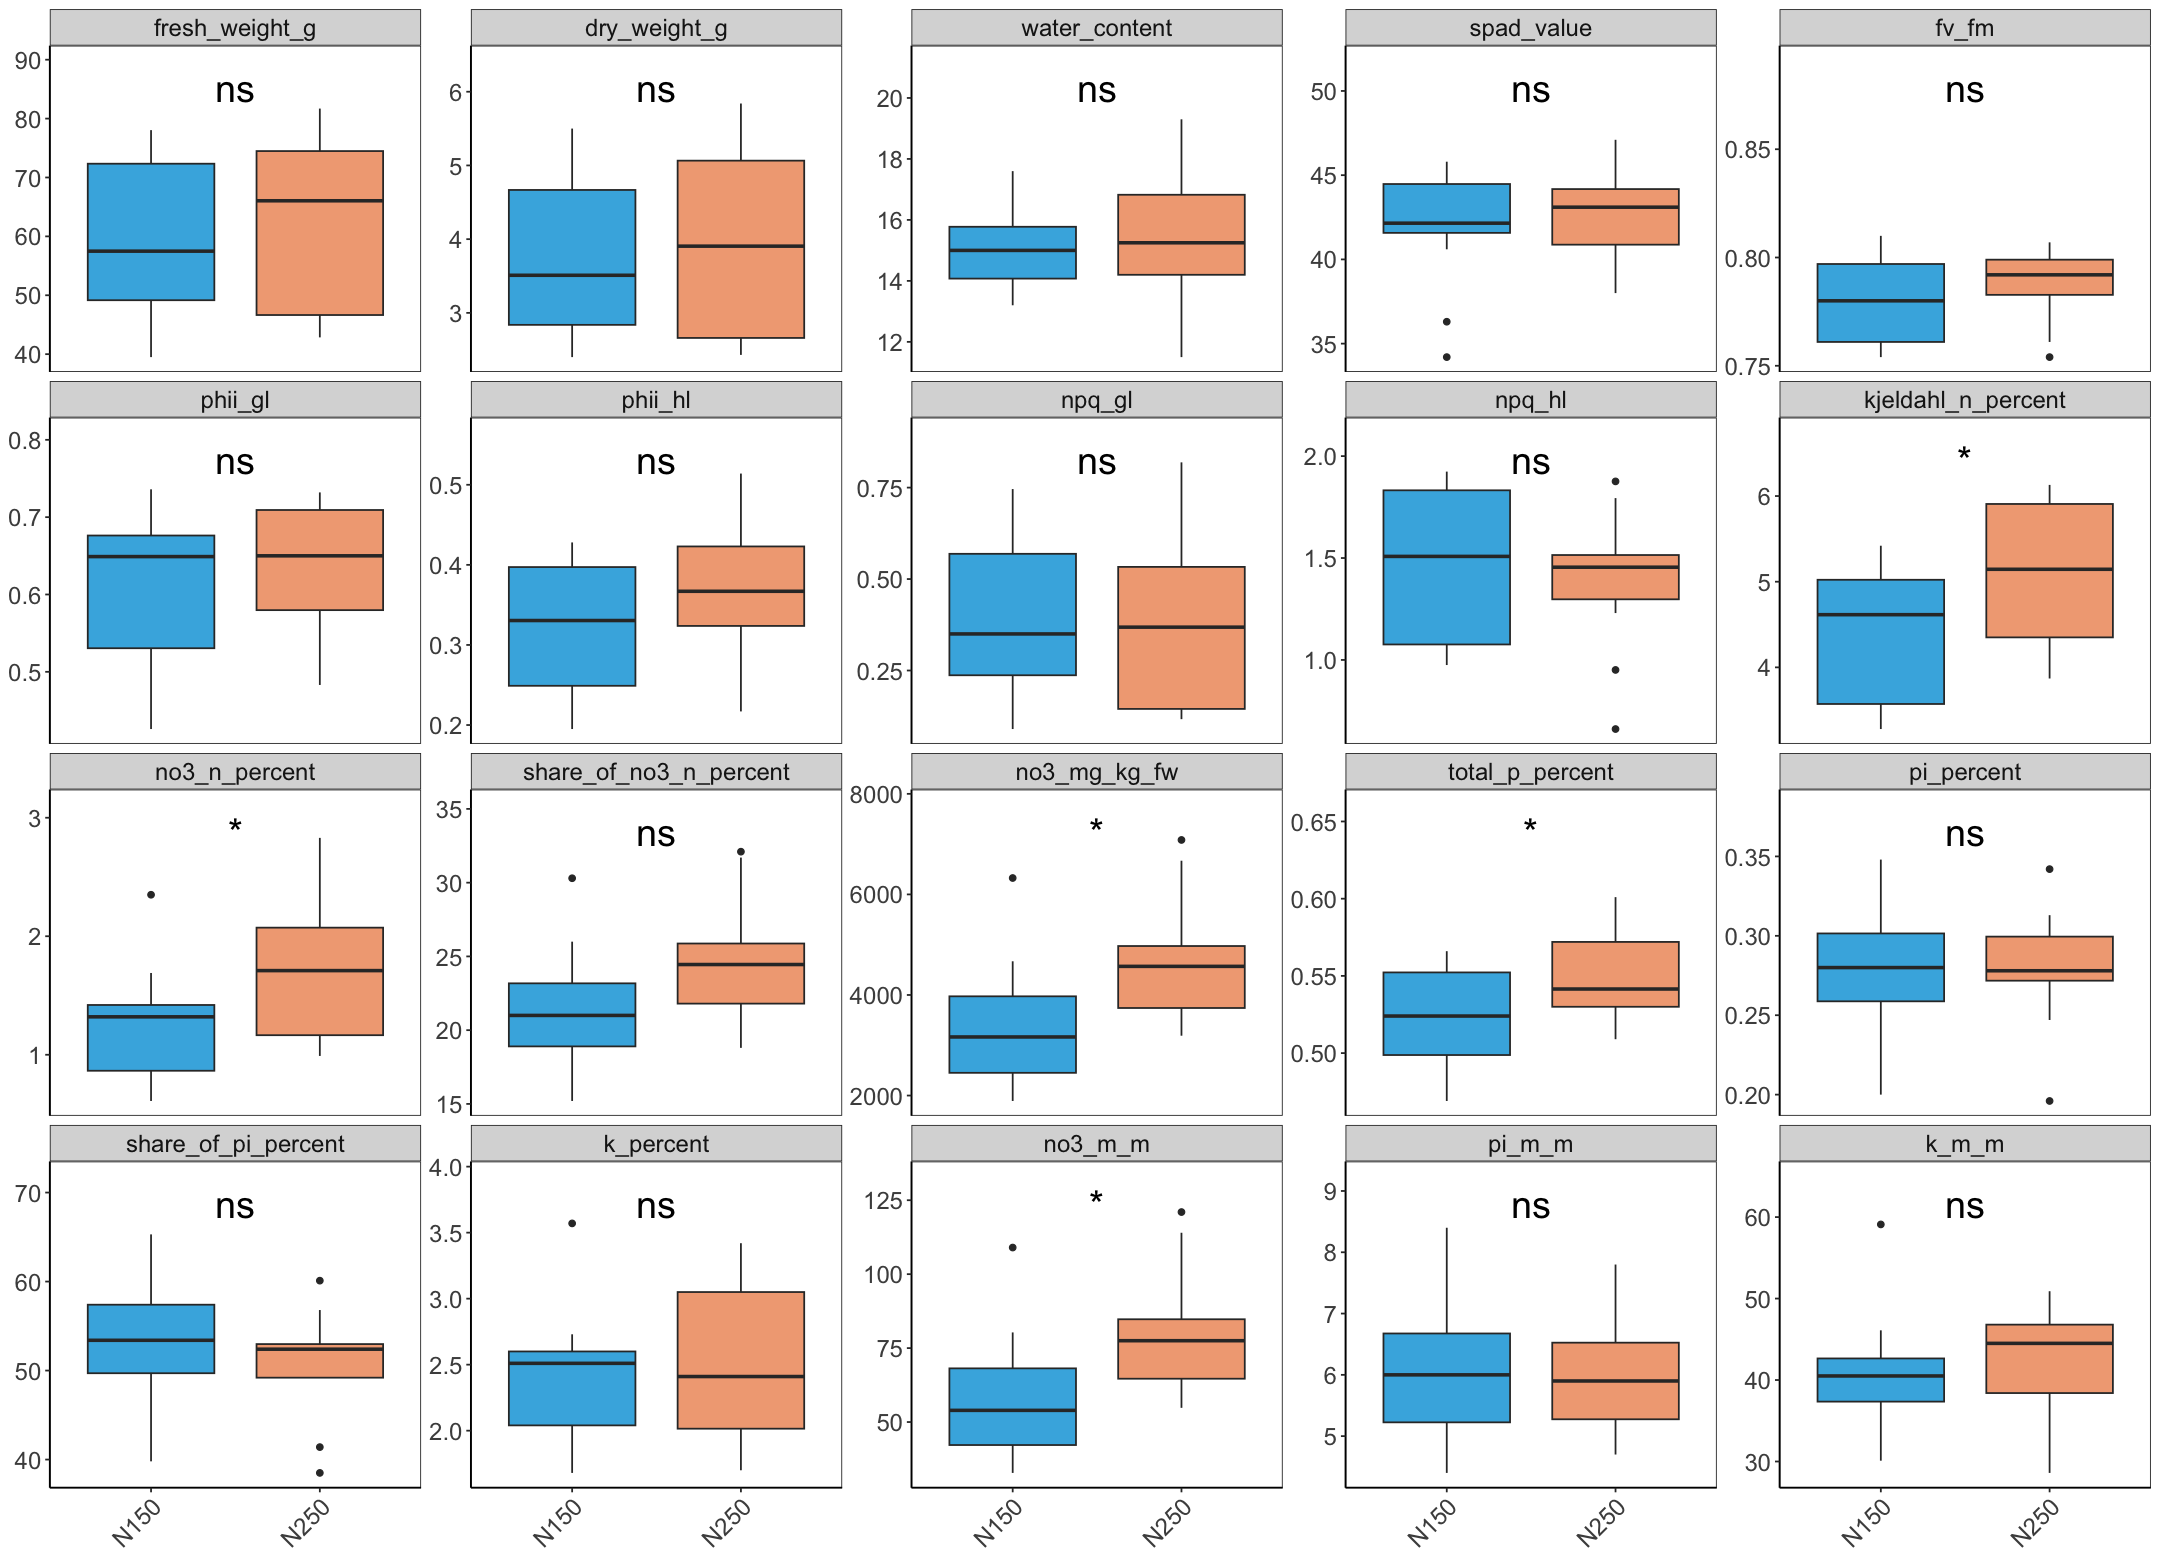

In [18]:
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code3 <- c("N150" = "#44B3E1",
                 "N250" = "#F1A983")

# draw a plot
n_plot <- data_n |>
    ggplot(aes(x = sample, y = Value, fill = sample)) +
    geom_boxplot() +
    geom_text(data = f_t_n2,
              aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
              inherit.aes = FALSE,
              vjust = 1.5,
              size = 8)+
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code3) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
n_plot

## growth light vs high light

In [19]:
# wrangling
data_light <- data |>
    clean_names() |>
    dplyr::select(sample, das, phii_gl:npq_hl) |>
    pivot_longer(cols = phii_gl:npq_hl, names_to = "factor", values_to = "value")
head(data_light)

data_phii <- data_light |>
    filter(factor %in% c("phii_gl", "phii_hl"))
y_max_phii <- max(data_phii$value, na.rm = TRUE)

data_npq <- data_light |>
    filter(factor %in% c("npq_gl", "npq_hl"))
y_max_npq <- max(data_npq$value, na.rm = TRUE)

sample,das,factor,value
<chr>,<dbl>,<chr>,<dbl>
N150,32,phii_gl,0.426
N150,32,phii_hl,0.195
N150,32,npq_gl,0.367
N150,32,npq_hl,1.410
N250,32,phii_gl,0.549
N250,32,phii_hl,0.308


Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.


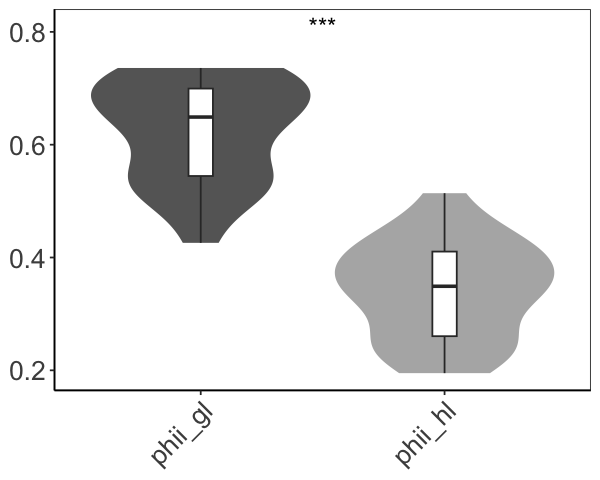

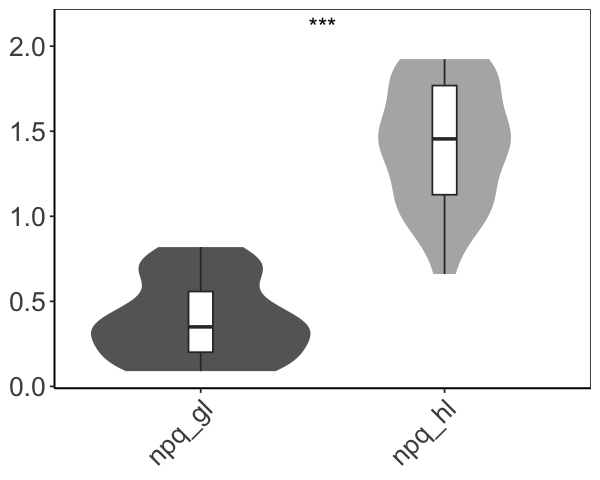

In [20]:
# define a function: statistical tests, plot
make_comparison_plot <- function(data_source, factor_prefix, fill_colours, data_plot) {
  f1 <- paste0(factor_prefix, "_gl")
  f2 <- paste0(factor_prefix, "_hl")
  g1 <- data_source |> filter(factor == f1) |> pull(value) |> na.omit()
  g2 <- data_source |> filter(factor == f2) |> pull(value) |> na.omit() 
  if (sd(g1) >= sd(g2)) {
    group1 <- g1; group2 <- g2
  } else {
    group1 <- g2; group2 <- g1
  }
  f_result <- var.test(group1, group2)
  t_result <- t.test(group1, group2, var.equal = f_result$p.value > 0.05)
  label_tbl <- tibble(factor = NA,  
                      label.pos = max(c(g1, g2)) * 1.1,  
                      label = symnum(t_result$p.value,
                                     cutpoints = c(0, 0.001, 0.01, 0.05, 1),
                                     symbols = c("***", "**", "*", "ns")))
  p <- data_plot |>
    ggplot(aes(x = factor, y = value, fill = factor)) +
    geom_violin(colour = "transparent") +
    geom_boxplot(width = 0.1, fill = "white") +
    geom_text(data = label_tbl, 
              aes(x = 1.5, y = label.pos, label = label), 
              inherit.aes = FALSE, size = 5) +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = fill_colours) +
    theme_bw() +
    theme(
      text = element_text(size = 20, colour = "black"),
      axis.line = element_line(colour = "black"),
      axis.text.x = element_text(angle = 45, hjust = 1), 
      panel.grid = element_blank(),
      plot.title = element_text(hjust = 0.5),
      legend.position = "none"
    )
  return(p)
}

# draw plots
options(repr.plot.width = 5, repr.plot.height = 4)

colour_code_phii <- c("phii_gl" = "gray40", "phii_hl" = "gray70")
colour_code_npq  <- c("npq_gl"  = "gray40", "npq_hl"  = "gray70")

phii_plot <- make_comparison_plot(data_light, "phii", colour_code_phii, data_phii)
npq_plot  <- make_comparison_plot(data_light, "npq",  colour_code_npq,  data_npq)

phii_plot
npq_plot

## Heat Map and Comparison

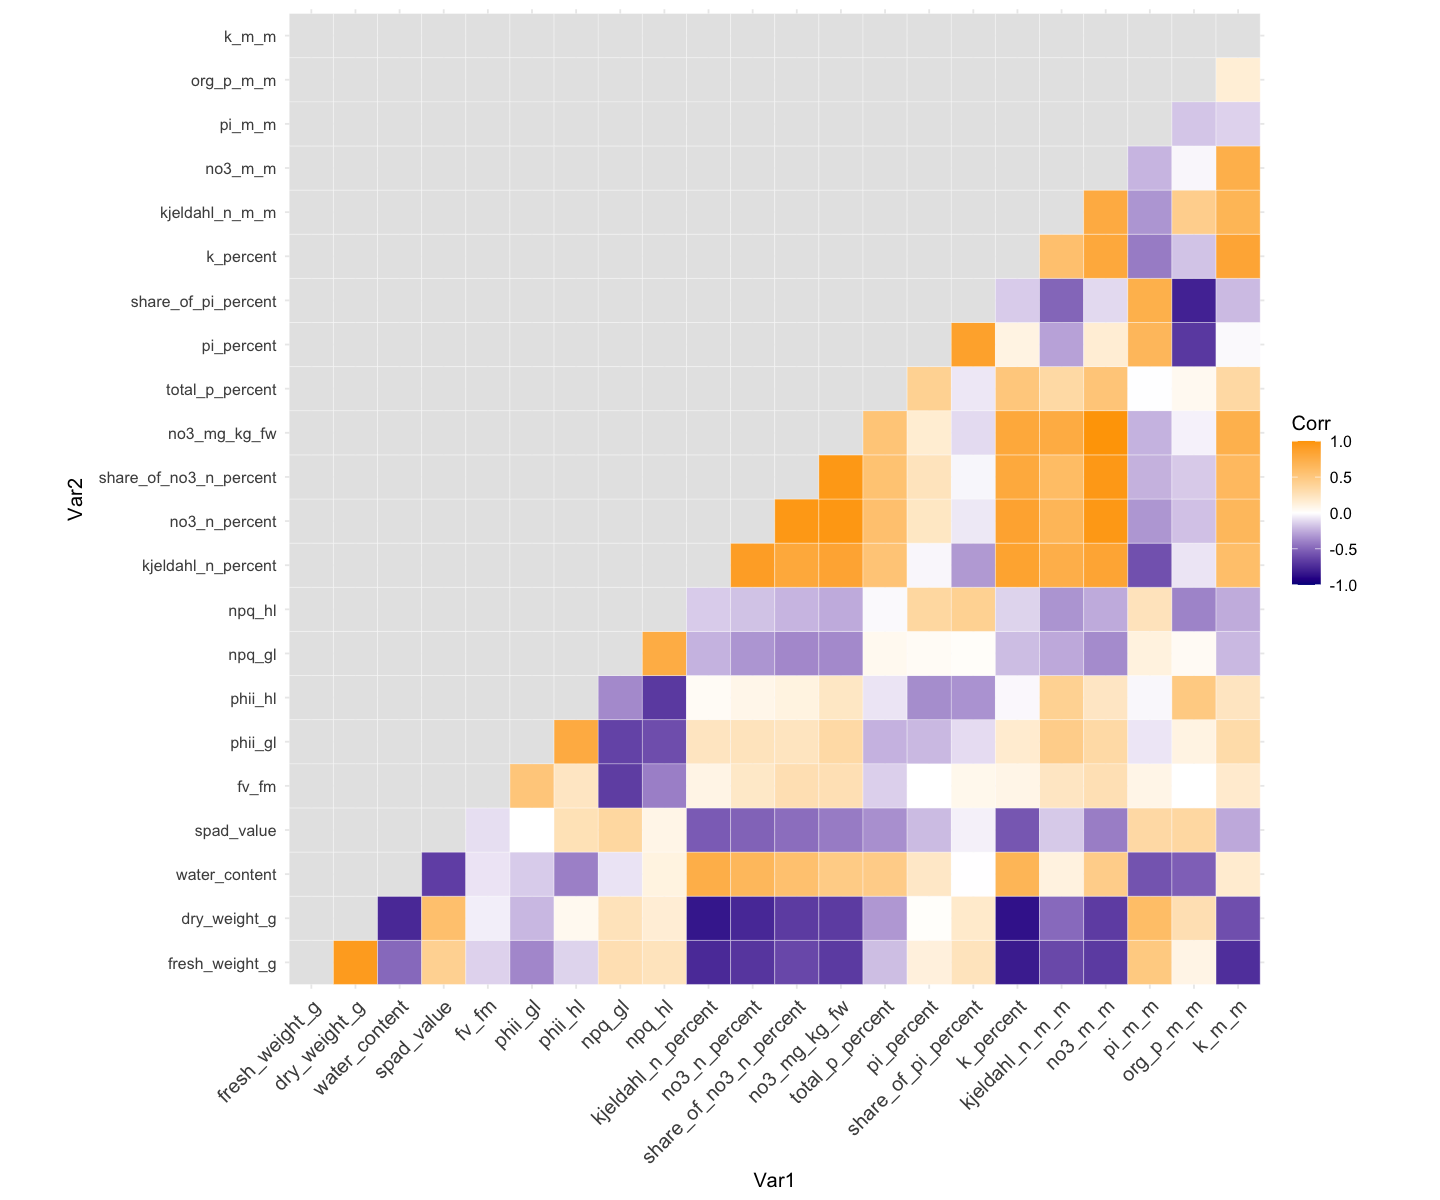

In [23]:
# compute absolute amount
data_wl_m_m <- data_wl |>
    mutate(kjeldahl_n_m_m = kjeldahl_n_percent /100 / 14.0067 * 1000 / (water_content / 1000),
           org_p_m_m = (total_p_percent-pi_percent) / 100 / 30.974 * 1000 / (water_content / 1000)) |>
    relocate(kjeldahl_n_m_m, .before = 21) |>
    relocate(org_p_m_m, .before = 24)

# draw a heat map
library(reshape2) 
options(repr.plot.width = 12, repr.plot.height = 10)

cor_matrix <- data_wl_m_m |>
    dplyr::select(-sample_label, -das, -sample) |>
    cor(use = "complete.obs")  
cor_matrix[upper.tri(cor_matrix)] <- NA
diag(cor_matrix)　<- NA
cor_matrix <- melt(cor_matrix)

cor_plot <- cor_matrix |>
    ggplot(aes(Var1, Var2, fill = value)) +
    geom_tile(colour = "white") +
    scale_fill_gradient2(low = "darkblue", high = "orange", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name = "Corr", na.value = "grey90") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
          text = element_text(size = 12)) +
    coord_fixed()

cor_plot

In [41]:
## compute r values for further analysis
r_k_no3 <- cor(data_wl_m_m$k_m_m, data_wl_m_m$no3_m_m, 
                 use = "complete.obs", method = "pearson")
r_k_no3_txt <- sprintf("R = %.3f", r_k_no3)  

r_pi_kjeldahl_n <- cor(data_wl_m_m$pi_m_m, data_wl_m_m$kjeldahl_n_m_m, 
                      use = "complete.obs", method = "pearson")
r_pi_kjeldahl_n_txt <- sprintf("R = %.3f", r_pi_kjeldahl_n)    

r_pi_no3 <- cor(data_wl_m_m$pi_m_m, data_wl_m_m$no3_m_m, 
                      use = "complete.obs", method = "pearson")
r_pi_no3_txt <- sprintf("R = %.3f", r_pi_no3)    

r_org_p_kjeldahl_n <- cor(data_wl_m_m$org_p_m_m, data_wl_m_m$kjeldahl_n_m_m, 
                      use = "complete.obs", method = "pearson")
r_org_p_kjeldahl_n_txt <- sprintf("R = %.3f", r_org_p_kjeldahl_n)    

r_org_p_no3 <- cor(data_wl_m_m$org_p_m_m, data_wl_m_m$no3_m_m, 
                      use = "complete.obs", method = "pearson")
r_org_p_no3_txt <- sprintf("R = %.3f", r_org_p_no3)    

r_org_p_kjeldahl_n_25d <- data_wl_m_m |>
    filter(das == "25d")  |>
    with(cor(org_p_m_m, kjeldahl_n_m_m, 
             use = "complete.obs", method = "pearson"))
r_org_p_kjeldahl_n_25d_txt <- sprintf("R = %.3f", r_org_p_kjeldahl_n_25d)
r_org_p_kjeldahl_n_25d_txt

r_org_p_kjeldahl_n_32d <- data_wl_m_m |>
    filter(das == "32d")  |>
    with(cor(org_p_m_m, kjeldahl_n_m_m, 
             use = "complete.obs", method = "pearson"))
r_org_p_kjeldahl_n_32d_txt <- sprintf("R = %.3f", r_org_p_kjeldahl_n_32d)
r_org_p_kjeldahl_n_32d_txt

[1] "R = 0.456"

[1] "R = 0.848"

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


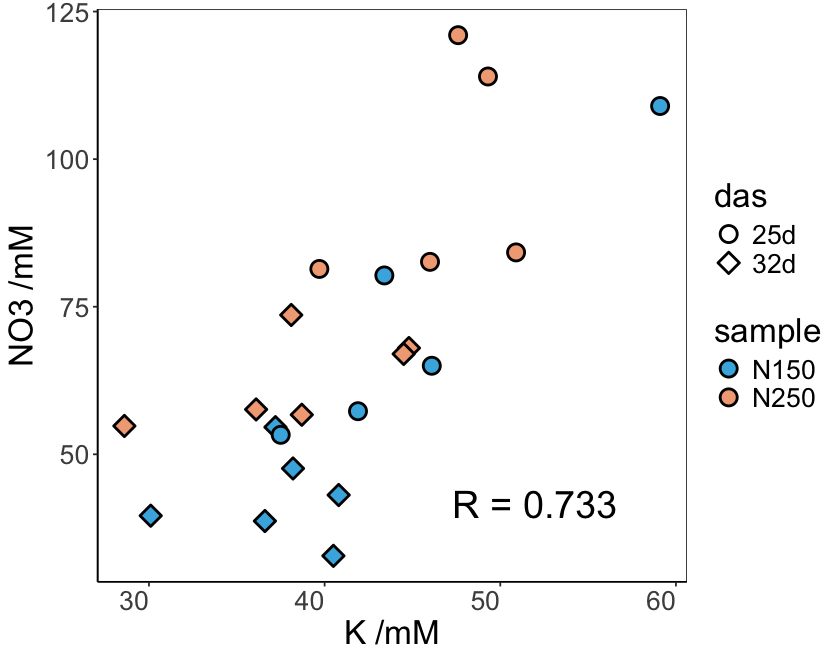

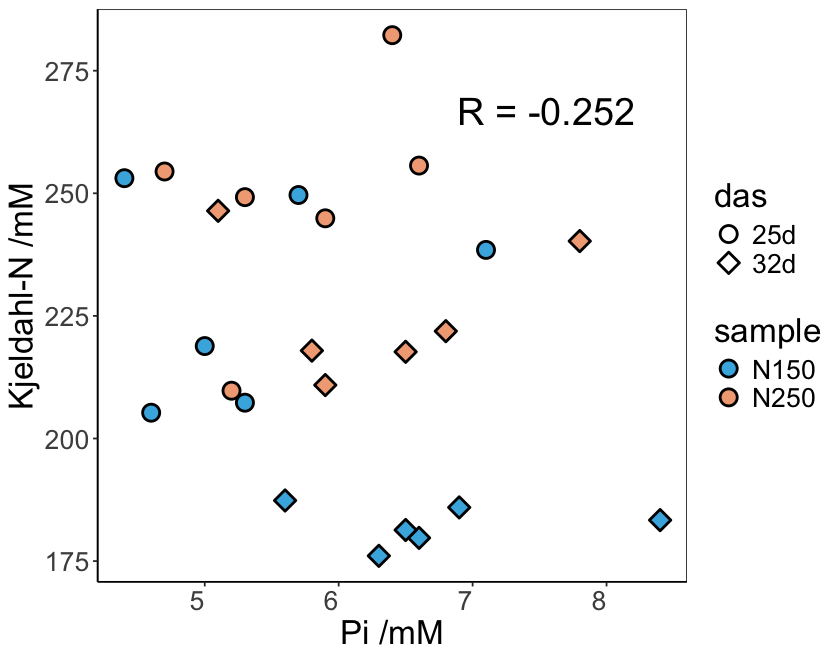

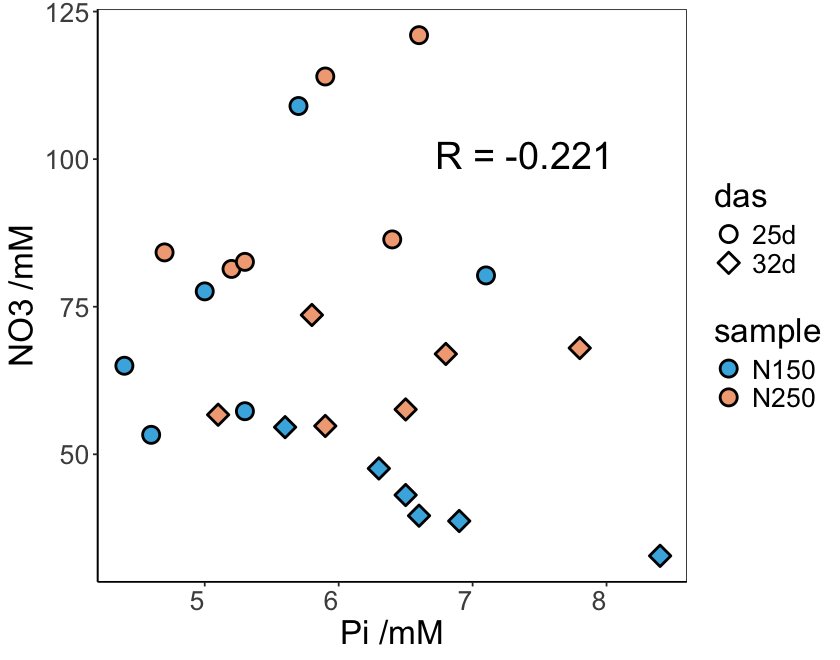

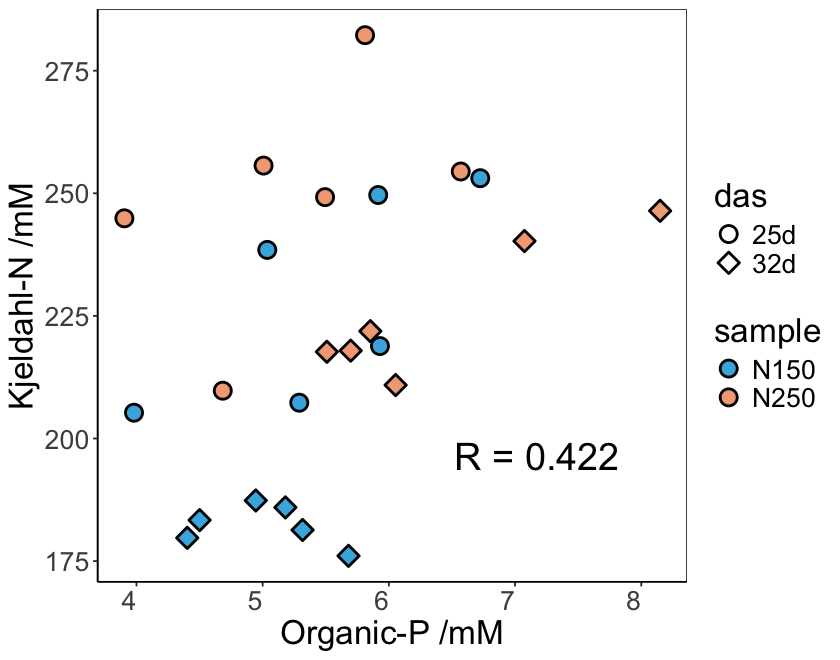

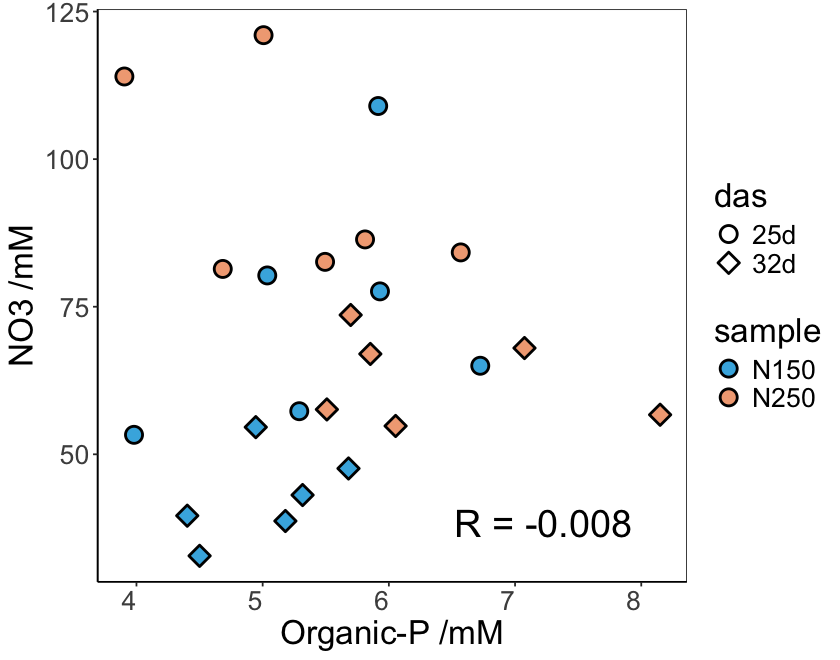

In [27]:
# define a function to make scatter plots
make_scatter <- function(varX, varY, labX, labY, r_txt = "", x_pos, y_pos) {
  data_wl_m_m |>
    ggplot(aes(x = .data[[varX]], y = .data[[varY]], fill = sample, shape = das)) +
    geom_point(size = 4, colour = "black", stroke = 1.2) +
    annotate("text",
             x = max(data_wl_m_m[[varX]], na.rm = TRUE) * x_pos,
             y = min(data_wl_m_m[[varY]], na.rm = TRUE) * y_pos,
             label = r_txt,   
             size  = 8,
             hjust = 0, vjust = 0) +
    labs(x = labX, y = labY, legend = "Sample") +
    scale_fill_manual(values = colour_code3) +
    scale_shape_manual(values = c(21, 23)) +
    guides(fill = guide_legend(override.aes = list(shape = 21)), 
           shape = guide_legend(override.aes = list(fill = "white"))) +
    theme_bw() +
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(hjust = 1), 
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "right"
    )
}

# draw plots
options(repr.plot.width = 7, repr.plot.height = 5.5)
k_no3_plot <- make_scatter("k_m_m", "no3_m_m", "K /mM", "NO3 /mM", 
                           r_k_no3_txt, 0.8, 1.2)
pi_kjeldahl_n_plot <- make_scatter("pi_m_m", "kjeldahl_n_m_m", "Pi /mM", "Kjeldahl-N /mM",
                                   r_pi_kjeldahl_n_txt, 0.82, 1.5)  
pi_no3_plot <- make_scatter("pi_m_m", "no3_m_m", "Pi /mM", "NO3 /mM",
                                   r_pi_no3_txt, 0.8, 3)  
org_p_kjeldahl_n_plot <- make_scatter("org_p_m_m", "kjeldahl_n_m_m", "Organic-P /mM", "Kjeldahl-N /mM",
                                   r_org_p_kjeldahl_n_txt, 0.8, 1.1)  
org_p_no3_plot <- make_scatter("org_p_m_m", "no3_m_m", "Organic-P /mM", "NO3 /mM",
                                   r_org_p_no3_txt, 0.8, 1.1)  

k_no3_plot
pi_kjeldahl_n_plot
pi_no3_plot
org_p_kjeldahl_n_plot
org_p_no3_plot

In [42]:
head(data_wl_m_m)

sample,das,sample_label,fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,⋯,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,kjeldahl_n_m_m,no3_m_m,pi_m_m,org_p_m_m,k_m_m
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N150,32d,N150_32d,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,3200,0.566,0.301,53.2,2.51,187.3587,54.6,5.6,4.945412,37.2
N250,32d,N250_32d,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,3190,0.561,0.276,49.2,1.70,210.8953,54.8,5.9,6.053464,28.6
N150,25d,N150_25d,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,4583,0.516,0.235,45.5,NA,218.8495,77.6,5.0,5.929493,NA
N250,25d,N250_25d,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,5104,0.566,0.296,52.3,NA,282.2459,86.4,6.4,5.811326,NA
N150,32d,N150_32d,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,2292,0.489,0.294,60.1,1.68,179.7342,39.6,6.6,4.402519,30.1
N250,32d,N250_32d,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,3336,0.532,0.288,54.1,2.01,217.6780,57.6,6.5,5.508794,36.1


In [47]:
N_P_ratio <- data_wl_m_m |>
    mutate(N_P_ratio = kjeldahl_n_m_m / org_p_m_m) |>
    summarize(N_P_ratio_mean = mean(N_P_ratio))
N_P_ratio

N_P_ratio_25d <- data_wl_m_m |>
    filter(das == "25d") |>
    mutate(N_P_ratio = kjeldahl_n_m_m / org_p_m_m) |>
    summarize(N_P_ratio_mean = mean(N_P_ratio))
N_P_ratio_25d

N_P_ratio_32d <- data_wl_m_m |>
    filter(das == "32d") |>
    mutate(N_P_ratio = kjeldahl_n_m_m / org_p_m_m) |>
    summarize(N_P_ratio_mean = mean(N_P_ratio))
N_P_ratio_32d

N_P_ratio_mean
<dbl>
40.88473


N_P_ratio_mean
<dbl>
45.50557


N_P_ratio_mean
<dbl>
36.26388


## 2024 Data

In [28]:
# read data
data24 <- read_csv("data/2024_WholeClass.csv")

New names:
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
Rows: 990 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Sample
dbl (19): Group, DAS, Fresh Weight (g), Dry Weight (g), Water Content, SPAD ...
lgl  (8): ...21, ...22, ...23, ...24, ...25, ...26, ...27, ...28

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
# wrangle data
data24_das <- data24 |>
    mutate(DAS = str_c(DAS, "d")) |>
    clean_names() |>
    dplyr::select(das:k_m_m) |>
    filter(!is.na(das)) |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data24_das)

das,Variable,Value
<chr>,<chr>,<dbl>
40d,fresh_weight_g,68.620
40d,dry_weight_g,6.790
40d,water_content,9.100
40d,spad_value,41.900
40d,fv_fm,0.776
40d,phii,0.518


In [30]:
# f-test for data24_das
f_t_das24 <- data24_das |>
    group_split(Variable) |>
    map_dfr(function(df) {varname <- unique(df$Variable)
                        g1 <- df %>% filter(das == "40d") %>% pull(Value) %>% na.omit()
                        g2 <- df %>% filter(das == "35d") %>% pull(Value) %>% na.omit()
                        if (sd(g1) >= sd(g2)) {group1 <- g1
                                               group2 <- g2} 
                        else {group1 <- g2
                              group2 <- g1}
                        f_test <- var.test(group1, group2)
                        t_test <- t.test(group1, group2, var.equal = f_test$p.value > 0.05)
                        tibble(Variable = varname,
                               f_p_value = f_test$p.value,
                               var_equal = f_test$p.value > 0.05,
                               t_p_value = t_test$p.value,
                               t_statistic = t_test$statistic,
                               t_method = t_test$method,
                               t_p_signif = symnum(t_test$p.value, 
                                                   corr = FALSE,
                                                   cutpoints = c(0,0.001,0.01,0.05,1),
                                                   symbols = c("***", "**", "*", "ns")))})

head(f_t_das24)
f_t_das24_false <- f_t_das24 |>
    filter(var_equal == FALSE) |>
    dplyr::select(Variable)
f_t_das24_false

Variable,f_p_value,var_equal,t_p_value,t_statistic,t_method,t_p_signif
<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>,<noquote>
dry_weight_g,0.59994660,TRUE,1.197713e-08,-8.443843,Two Sample t-test,***
fresh_weight_g,0.27606144,TRUE,1.369133e-02,2.660420,Two Sample t-test,*
fv_fm,0.07804574,TRUE,3.595171e-01,-0.934177,Two Sample t-test,ns
k_m_m,0.56456018,TRUE,1.262412e-01,-1.584186,Two Sample t-test,ns
k_percent,0.18407155,TRUE,5.212219e-04,4.004294,Two Sample t-test,***
kjeldahl_n_percent,0.09730753,TRUE,7.950641e-04,3.836789,Two Sample t-test,***


Variable
<chr>
no3_m_m
no3_mg_kg_fw
no3_n_percent
spad_value


In [31]:
# define the position of p.signif
data24_das_max <- data24_das |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

f_t_das24 <- f_t_das24 |>
  left_join(data24_das_max, by = "Variable")

# define the order
variable_order_das24 <- unique(data24_das$Variable)
data24_das$Variable <- factor(data24_das$Variable, levels = variable_order_das24)
data24_das_max$Variable <- factor(data24_das_max$Variable, levels = variable_order_das24)
f_t_das24$Variable <- factor(f_t_das24$Variable, levels = variable_order_das24)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.


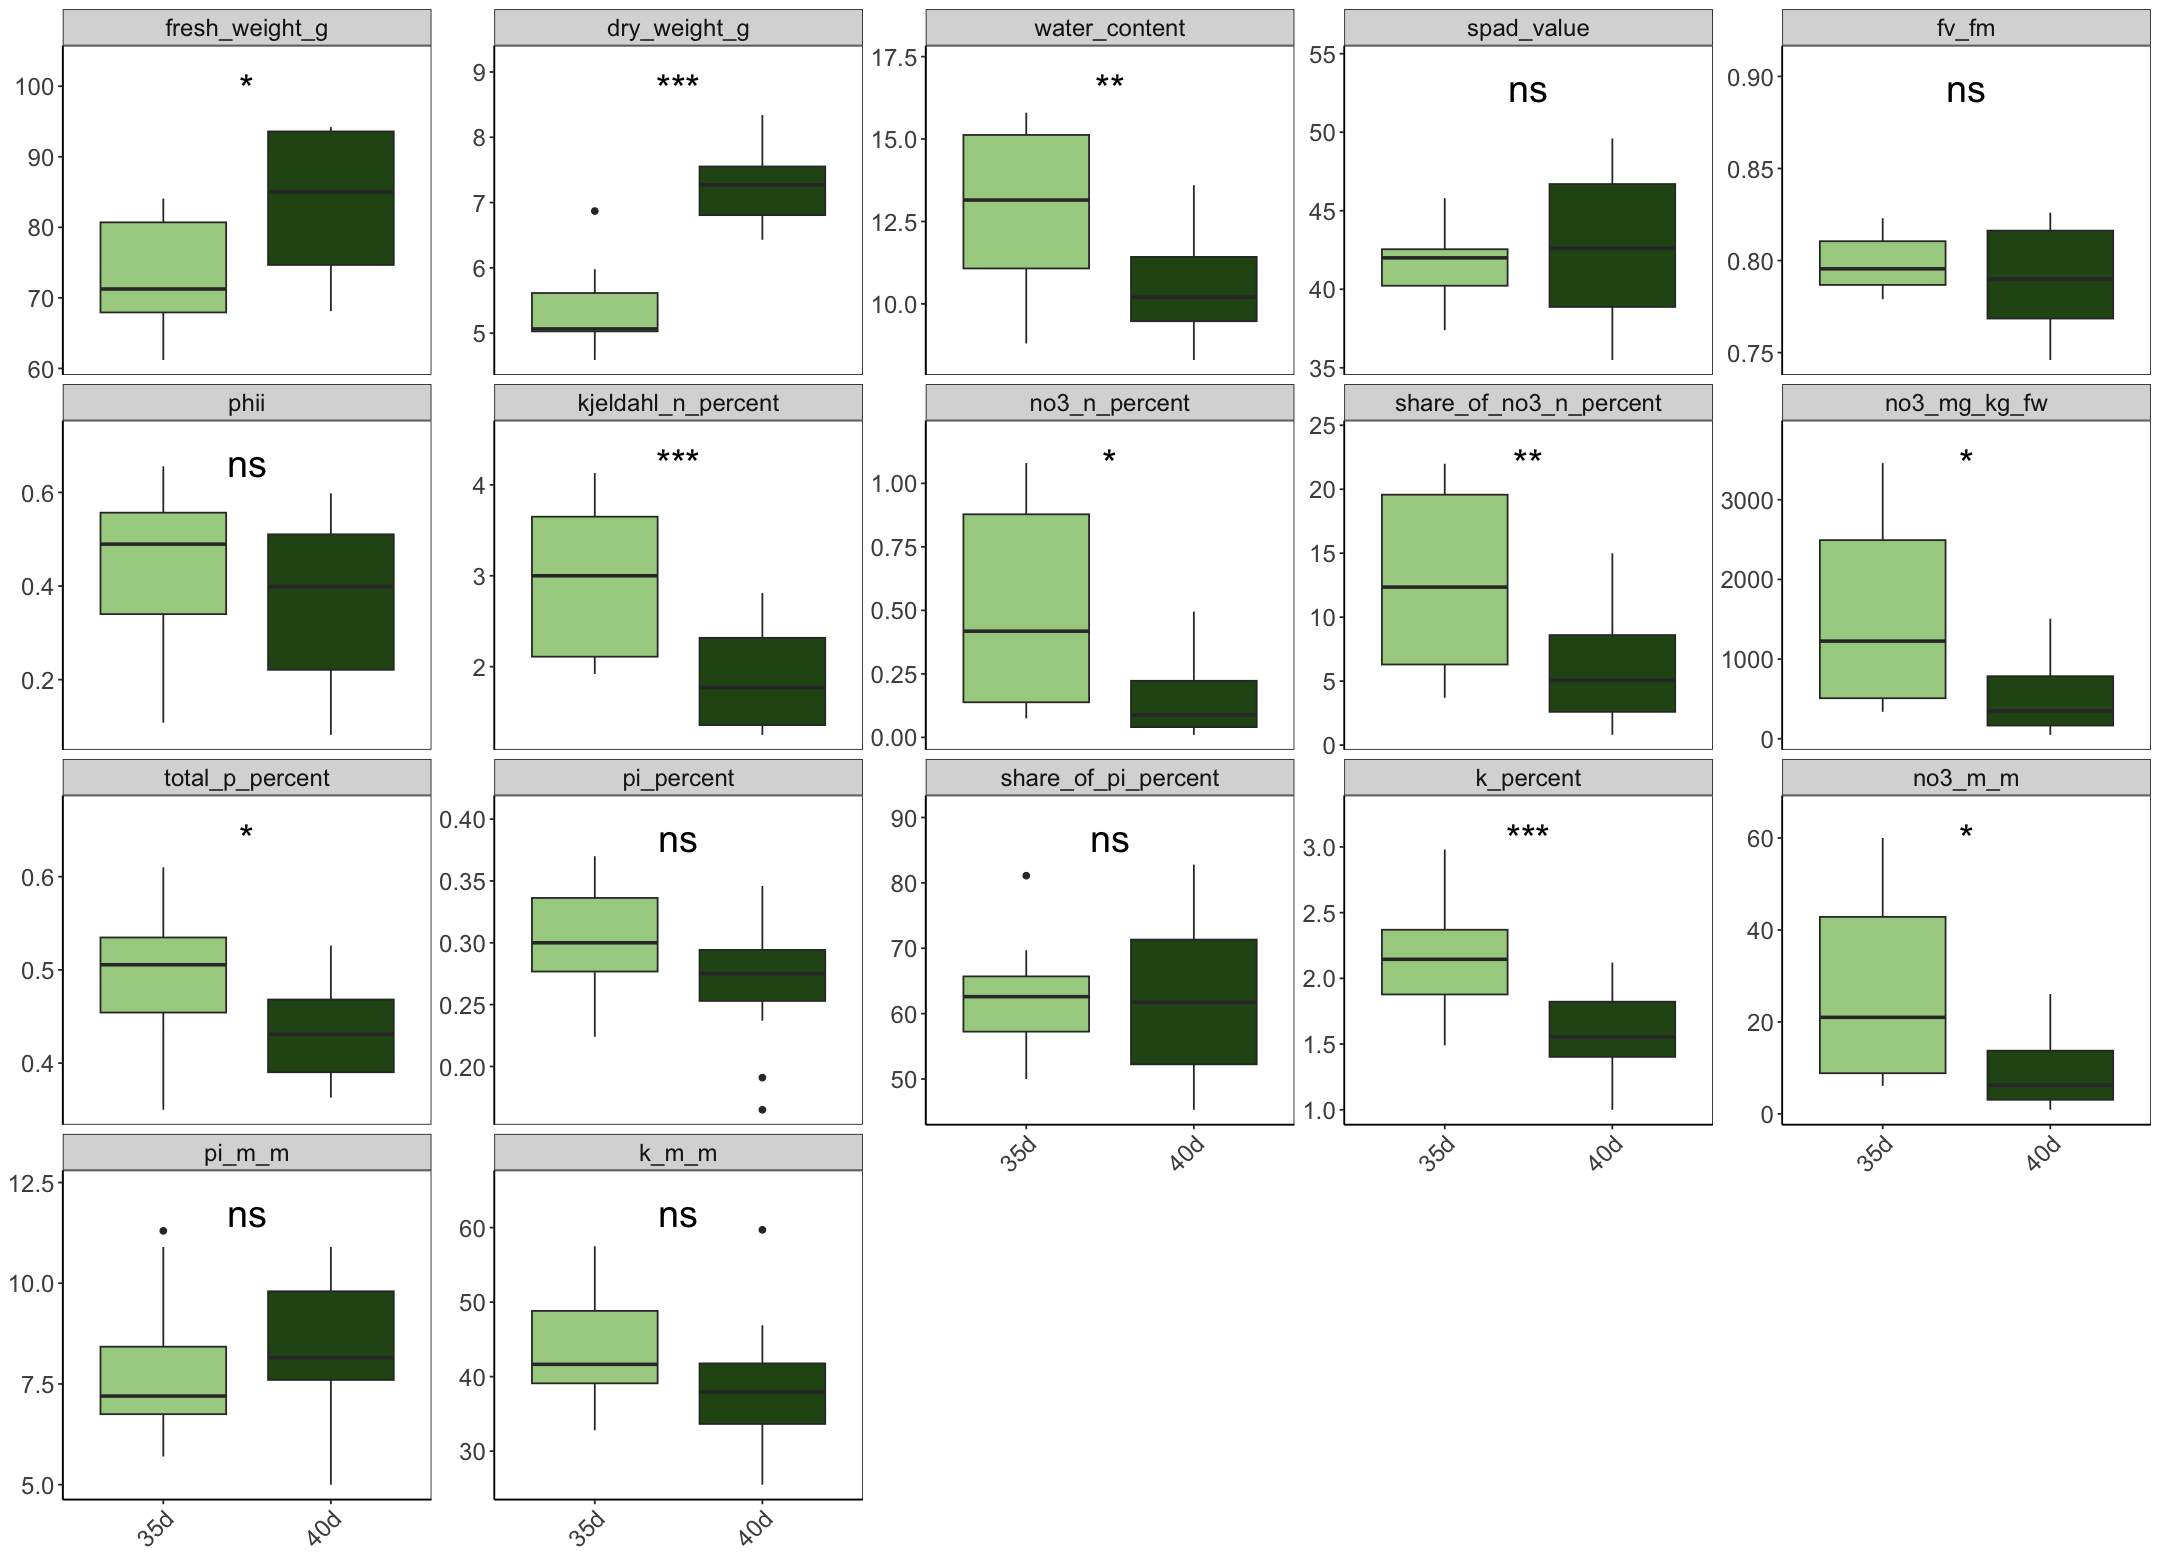

In [32]:
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code24_das <- c("35d" = "#A6D08F", "40d" = "#275317")

# draw a plot
das24_plot <- data24_das |>
    ggplot(aes(x = das, y = Value, fill = das)) +
    geom_boxplot() +
    geom_text(data = f_t_das24,
              aes(x = 1.5, y = p.signif_pos, label = t_p_signif),
              inherit.aes = FALSE,
              vjust = 1.5,
              size = 8) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code24_das) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
das24_plot

## Save files

In [33]:
# save plots
ggsave("output/plot/das_plot.png", plot = das_plot, width = 18, height = 13, dpi = 300)
ggsave("output/plot/n_plot.png", plot = n_plot, width = 18, height = 13, dpi = 300)
ggsave("output/plot/all_plot.png", plot = facet_plot, width = 18, height = 13, dpi = 300)

ggsave("output/plot/kjeldahl_plot.png", plot = kjeldahl_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/no3_plot.png", plot = no3_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/k_plot.png", plot = k_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/total_p_plot.png", plot = total_p_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/pi_plot.png", plot = pi_plot, width = 5, height = 4, dpi = 300)

ggsave("output/plot/phii_plot.png", plot = phii_plot, width = 5, height = 4, dpi = 300)
ggsave("output/plot/npq_plot.png", plot = npq_plot, width = 5, height = 4, dpi = 300)

ggsave("output/plot/cor_plot.png", plot = cor_plot, width = 12, height = 10, dpi = 300)
ggsave("output/plot/k_no3_plot.png", plot = k_no3_plot, width = 7, height = 5.5, dpi = 300)
ggsave("output/plot/pi_kjeldahl_n_plot.png", plot = pi_kjeldahl_n_plot, width = 7, height = 5.5, dpi = 300)
ggsave("output/plot/pi_no3_plot.png", plot = pi_no3_plot, width = 7, height = 5.5, dpi = 300)
ggsave("output/plot/org_p_kjeldahl_n_plot.png", plot = org_p_kjeldahl_n_plot, width = 7, height = 5.5, dpi = 300)
ggsave("output/plot/org_p_no3_plot.png", plot = org_p_no3_plot, width = 7, height = 5.5, dpi = 300)

# save test results
write.csv(f_t_das, "output/test_result/f_t_das.csv", row.names = FALSE)
write.csv(f_t_n, "output/test_result/f_t_n.csv", row.names = FALSE)
pval_result_all <- data_long |>
    compare_means(formula = Value ~ sample_label,
                 group.by = "Variable",
                 method = "t.test",
                 var.equal = FALSE,
                 paired = FALSE)
write.csv(pval_result_all, "output/test_result/t_test_results_all.csv", row.names = FALSE)

Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”
Don't know how to automatically pick scale for object of type <noquote>.
Defaulting to continuous.
Warning message:
“Removed 1 row containing missing values or values outside the sc